# LLM-Empowered Agent-Based Simulation
## Macro-level Comparison of Two Experiments

This notebook demonstrates how micro-level cognitive differences
(memory + personality) lead to different macro-level dynamics,
following the evaluation framework proposed in
*Humanities and Social Sciences Communications (2024)*.


In [55]:
import matplotlib.pyplot as plt

In [73]:
class Agent:
    def __init__(self, agent_id, personality):
        self.id = agent_id
        self.personality = personality  # aggressive | cautious
        self.speed = 3
        self.position = 0
        self.memory = []

    def perceive(self, agents):
        front_agents = [a for a in agents if a.position > self.position]
        if not front_agents:
            return None, None

        front = min(front_agents, key=lambda a: a.position)
        return front.position - self.position, front.position

    def reason(self, distance):
        if distance is not None and distance < 5:
            obs = "danger"
        else:
            obs = "move"

        self.memory.append(obs)
        if len(self.memory) > 3:
            self.memory.pop(0)

        danger_count = self.memory.count("danger")
        move_count = self.memory.count("move")

        if danger_count > move_count:
            if self.personality == "cautious":
                return "brake", f"Memory={self.memory}, braking"
            else:
                return "slow", f"Memory={self.memory}, slowing"
        else:
            return "move", f"Memory={self.memory}, moving"

    def act(self, action, front_position=None):
        if action == "brake":
            self.speed = max(0, self.speed - 2)
        elif action == "slow":
            self.speed = max(0, self.speed - 1)
        elif action == "move":
            self.speed = min(self.speed + 1, 5)

        if front_position is not None:
            self.position = min(
                self.position + self.speed,
                front_position - 0.1
            )
        else:
            self.position += self.speed



In [74]:
def run_simulation(personalities, steps=10):
    agents = [Agent(i, p) for i, p in enumerate(personalities)]

    # initial conditions (heavy interaction)
    initial_positions = [0, 2, 3]
    initial_speeds = [3, 2, 1]

    for agent, pos, spd in zip(agents, initial_positions, initial_speeds):
        agent.position = pos
        agent.speed = spd

    speed_history = {i: [] for i in range(len(agents))}
    position_history = {i: [] for i in range(len(agents))}

    for step in range(steps):
        decisions = []

        # ---------- Phase 1: perception + reasoning ----------
        for agent in agents:
            distance, front_pos = agent.perceive(agents)
            action, thought = agent.reason(distance)
            decisions.append((agent, action, front_pos))

        # ---------- Phase 2: action (simultaneous) ----------
        for agent, action, front_pos in decisions:
            agent.act(action, front_pos)

        # ✅ ---------- Phase 3: enforce single-lane physics ----------
        agents.sort(key=lambda a: a.position)

        for i in range(1, len(agents)):
            if agents[i].position <= agents[i - 1].position:
                agents[i].position = agents[i - 1].position + 0.1
                agents[i].speed = min(
                    agents[i].speed,
                    agents[i - 1].speed
                )

        # ---------- logging ----------
        for agent in agents:
            speed_history[agent.id].append(agent.speed)
            position_history[agent.id].append(agent.position)

    return speed_history, position_history



In [76]:
# Experiment 1: Mixed personalities
exp1_personalities = ["aggressive", "cautious", "cautious"]
exp1_speeds, exp1_positions = run_simulation(exp1_personalities)

In [77]:
# Experiment 2: Homogeneous cautious population
exp2_personalities = ["cautious", "cautious", "cautious"]
exp2_speeds, exp2_positions = run_simulation(exp2_personalities)

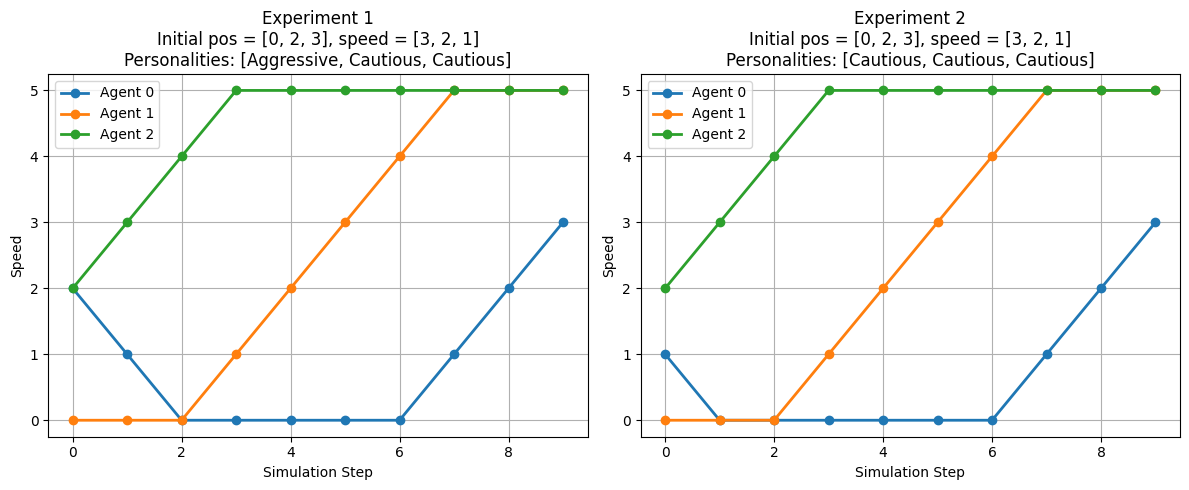

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# -------- Experiment 1 --------
plt.subplot(1, 2, 1)
for agent_id, speeds in exp1_speeds.items():
    plt.plot(speeds, marker='o', linewidth=2, label=f"Agent {agent_id}")

plt.title(
    "Experiment 1\n"
    "Initial pos = [0, 2, 3], speed = [3, 2, 1]\n"
    "Personalities: [Aggressive, Cautious, Cautious]"
)
plt.xlabel("Simulation Step")
plt.ylabel("Speed")
plt.legend()
plt.grid(True)


# -------- Experiment 2 --------
plt.subplot(1, 2, 2)
for agent_id, speeds in exp2_speeds.items():
    plt.plot(speeds, marker='o', linewidth=2, label=f"Agent {agent_id}")

plt.title(
    "Experiment 2\n"
    "Initial pos = [0, 2, 3], speed = [3, 2, 1]\n"
    "Personalities: [Cautious, Cautious, Cautious]"
)
plt.xlabel("Simulation Step")
plt.ylabel("Speed")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


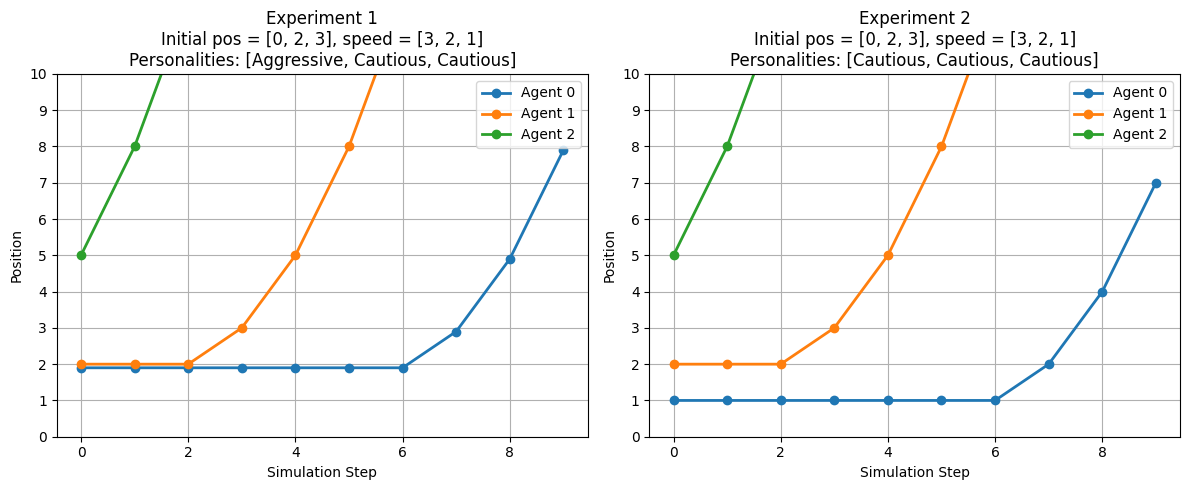

In [83]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

# -------- Experiment 1 --------
plt.subplot(1, 2, 1)
for agent_id, positions in exp1_positions.items():
    plt.plot(positions, marker='o', linewidth=2, label=f"Agent {agent_id}")

plt.title(
    "Experiment 1\n"
    "Initial pos = [0, 2, 3], speed = [3, 2, 1]\n"
    "Personalities: [Aggressive, Cautious, Cautious]"
)
plt.xlabel("Simulation Step")
plt.ylabel("Position")

# ✅ محور موقعیت از 0 تا 10 با تقسیم‌بندی واحدی
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

plt.legend()
plt.grid(True)


# -------- Experiment 2 --------
plt.subplot(1, 2, 2)
for agent_id, positions in exp2_positions.items():
    plt.plot(positions, marker='o', linewidth=2, label=f"Agent {agent_id}")

plt.title(
    "Experiment 2\n"
    "Initial pos = [0, 2, 3], speed = [3, 2, 1]\n"
    "Personalities: [Cautious, Cautious, Cautious]"
)
plt.xlabel("Simulation Step")
plt.ylabel("Position")

# ✅ همان تنظیم برای نمودار دوم
plt.ylim(0, 10)
plt.yticks(np.arange(0, 11, 1))

plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Analysis

The comparison clearly demonstrates that changing agent-level
cognitive traits (personality + memory) leads to significantly
different macro-level dynamics.

- Experiment 1 exhibits queue formation and freezing behavior.
- Experiment 2 shows smoother and more homogeneous speed patterns.

This validates the claim in the survey paper that memory-driven
LLM-inspired agents can generate emergent system-level phenomena.
